<a href="https://colab.research.google.com/github/likhith-kumarn/Data_Science/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Random Forest classifier
# Boosting algorithm
#use case: we are classifying a person is having  heart disease or not


import pandas as pd
df=pd.read_csv("/content/heart_v2_csv - Copy1.csv")
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df.shape

(270, 5)

In [7]:
# Feature Extraction
#x=['age', 'sex', 'BP', 'cholestrol']
#y=['heart disease']

x=df.iloc[:,:-1]
x

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [9]:
y=df['heart disease']
y

,heart disease
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=100,max_depth=5,oob_score=True)


In [15]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [17]:
model.oob_score_
# if it is more than 60 percent it is ok model

0.6481481481481481

In [18]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[25,  8],
       [10, 11]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6666666666666666

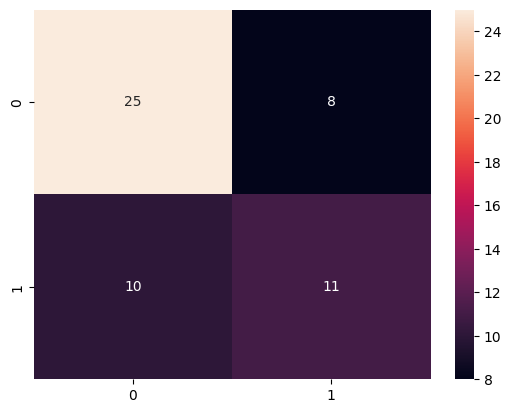

In [33]:
sns.heatmap(confusion,annot=True)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.76      0.74        33
           1       0.58      0.52      0.55        21

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.66      0.67      0.66        54



In [ ]:
# accuracy score : 70
#F1SCORE 71
#GOOD MODEL
#31/54=57 percent,not prone to heart attack
#23/54=42, percent prone to heart attack

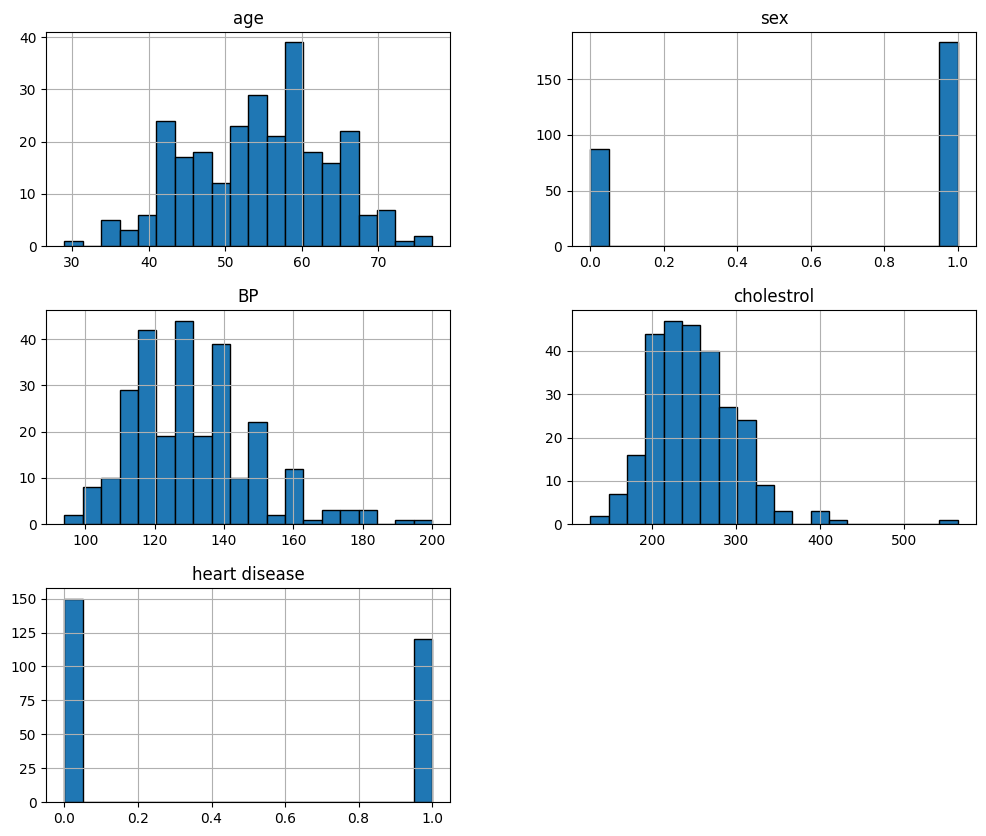

In [21]:
import matplotlib.pyplot as plt
df.hist(bins=20,figsize=(12,10),edgecolor='Black')
plt.show()

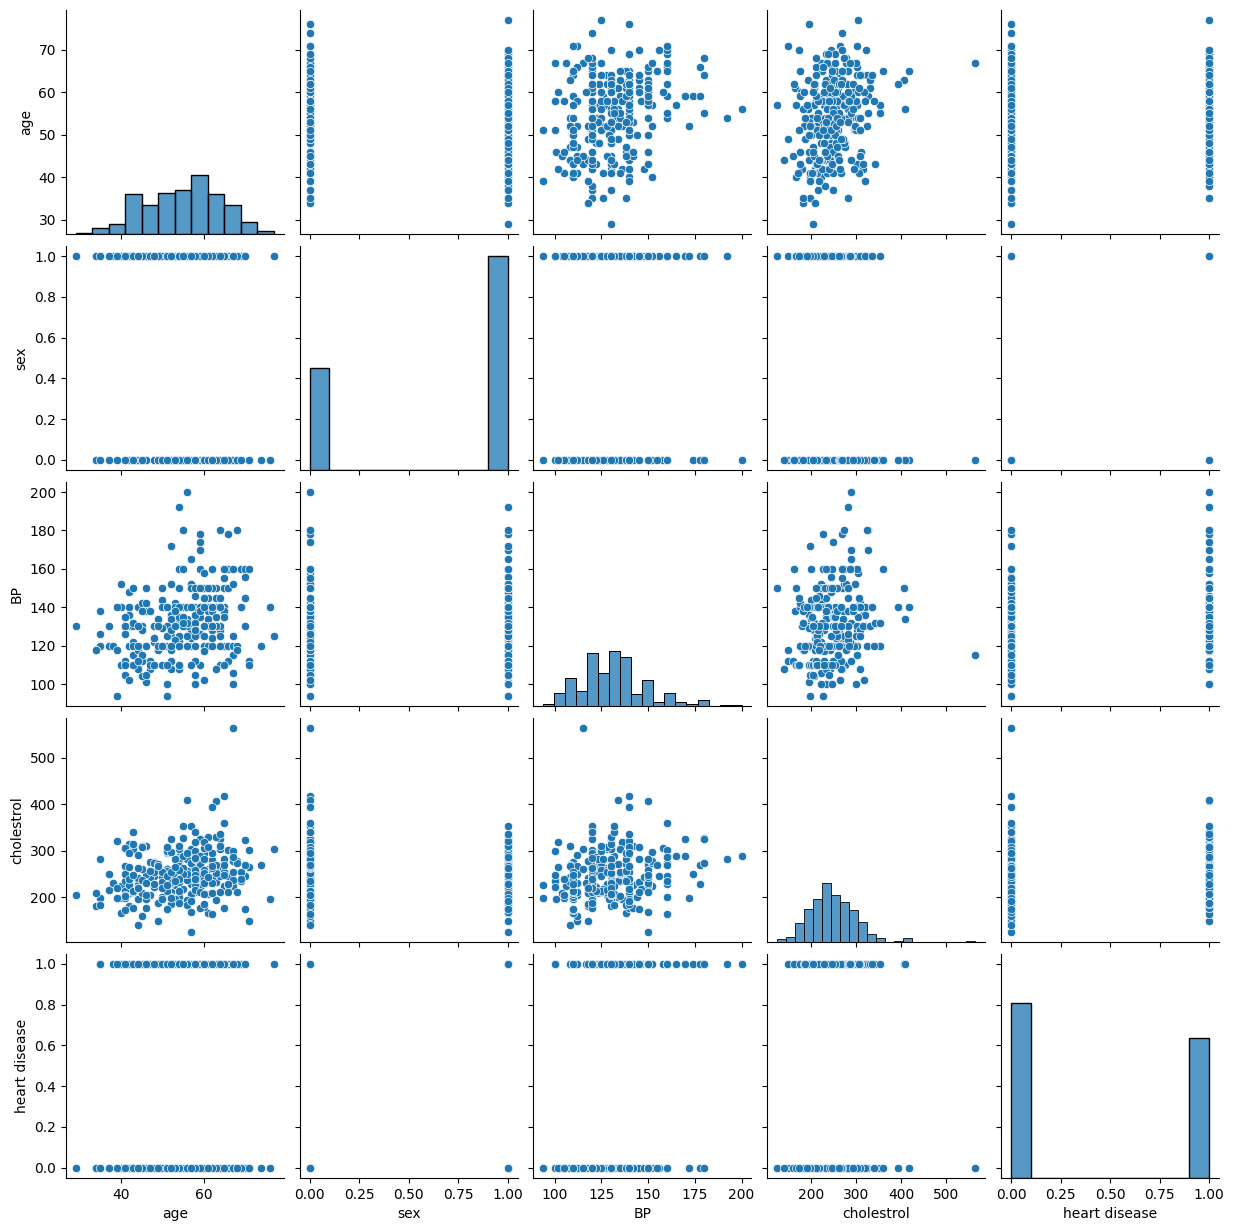

In [22]:
import seaborn as sns
sns.pairplot(df)
plt.show()

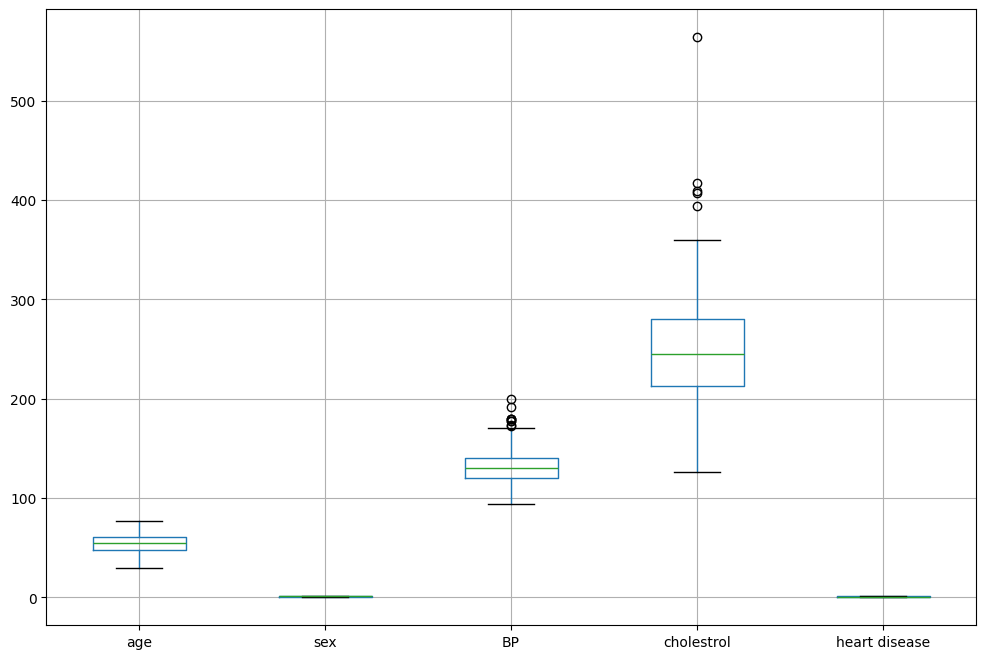

In [23]:
df.boxplot(figsize=(12,8))
plt.show()

In [25]:
Q1=df["BP"].quantile(0.25)
Q3=df["BP"].quantile(0.75)
IQR=Q3-Q1
df=df[(df['BP']>=(Q1-1.5*IQR)) & (df['BP']<=(Q3+1.5*IQR))]
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
264,48,1,110,229,1
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [27]:
Q1=df["cholestrol"].quantile(0.25)
Q3=df["cholestrol"].quantile(0.75)
IQR=Q3-Q1
df=df[(df['cholestrol']>=(Q1-1.5*IQR)) & (df['cholestrol']<=(Q3+1.5*IQR))]
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
5,65,1,120,177,0
...,...,...,...,...,...
264,48,1,110,229,1
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


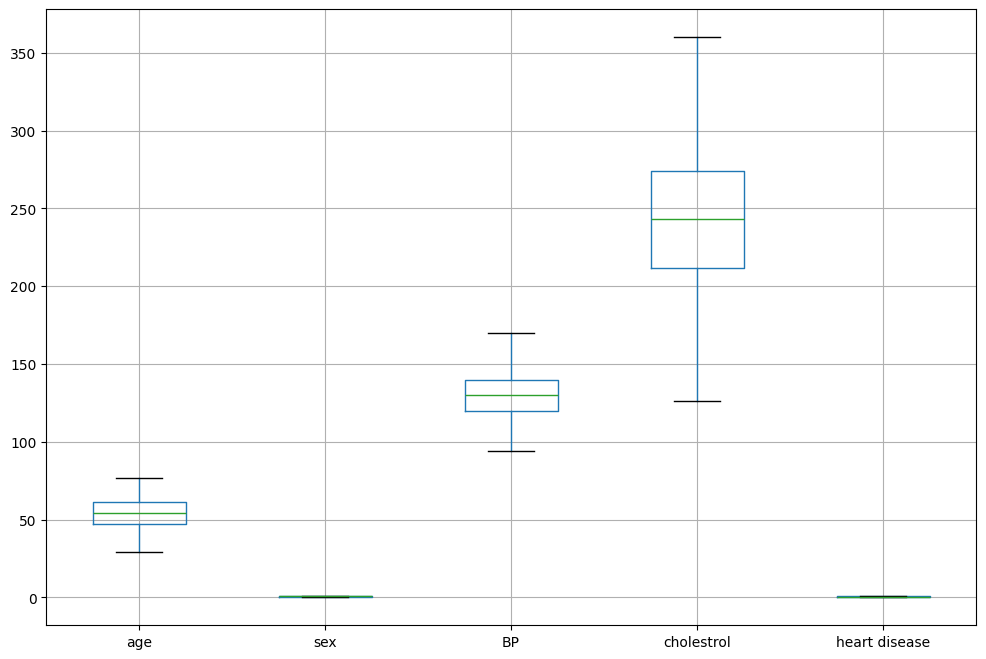

In [28]:
df.boxplot(figsize=(12,8))
plt.show()